In [141]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [142]:
df = load_diabetes()
X = df.data
y= df.target
X.shape

(442, 10)

In [143]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

# Linear Regression

In [144]:
# Linear Regression
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

In [145]:
print(reg.coef_)
print(reg.intercept_)

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

[  -9.16088483 -205.46225988  516.68462383  340.62734108 -895.54360867
  561.21453306  153.88478595  126.73431596  861.12139955   52.41982836]
151.88334520854633
R2 score 0.4399387660024645
RMSE 55.62759745954073


# Ridge (L2)

In [146]:
# Ridge 
reg = Ridge(alpha=0.1)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)


In [147]:
print(reg.coef_)
print(reg.intercept_)

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

[   6.64275308 -172.24216584  485.52387163  314.68212174  -72.93932312
  -80.59005344 -174.46651489   83.61665316  484.36328537   73.58415414]
151.92548050708137
R2 score 0.4519973816947852
RMSE 55.02548302426361


# Lasso (L1)

In [148]:
# Lasso
reg = Lasso(alpha=0.01)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

In [149]:
print(reg.coef_)
print(reg.intercept_)

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

[  -1.361404   -192.9442258   526.34851118  332.64905805 -430.20549544
  191.27787563  -44.0481133    68.99074735  688.38497566   47.93952847]
151.87688916358448
R2 score 0.4411227990495632
RMSE 55.568764819424246


# ElasticNet

In [150]:
# ElasticNet
reg = ElasticNet(alpha=0.005,l1_ratio=0.9)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4531493801165679

In [151]:
print(reg.coef_)
print(reg.intercept_)

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

[  12.9406495  -150.63558599  454.70518026  297.41673176  -40.62976416
  -82.61385235 -175.7996359    88.7282972   438.79648074   81.84882136]
151.92651072684774
R2 score 0.4531493801165679
RMSE 54.967615948077274


# Polynomial Ridge Regression

In [152]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

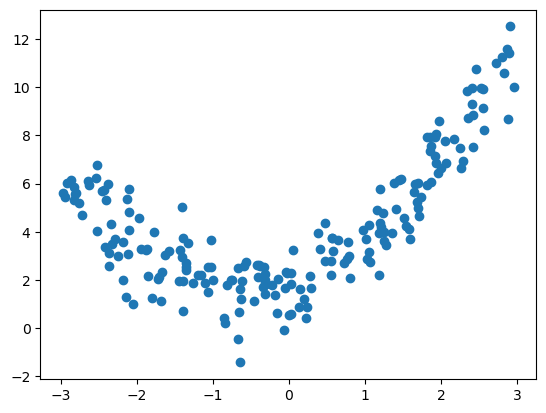

In [153]:
plt.scatter(X, y)
plt.show() 

In [154]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [155]:
#polynomial transformation

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=16,include_bias=True) #hyperparameter is degree

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [156]:
# Applying Polynomial Linear Regression
lr1 = Ridge(alpha=200)
lr1.fit(X_train_trans,y_train)
y_pred = lr1.predict(X_test_trans)


In [157]:
print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.8056568214084465
RMSE 1.0217491476922873


In [158]:
lr2 = Ridge(alpha=2)
lr2.fit(X_train_trans,y_train)
y_pred = lr2.predict(X_test_trans)

In [159]:
print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.8107666239222482
RMSE 1.008227414614734


In [160]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new1 = lr1.predict(X_new_poly)
y_new2 = lr2.predict(X_new_poly)

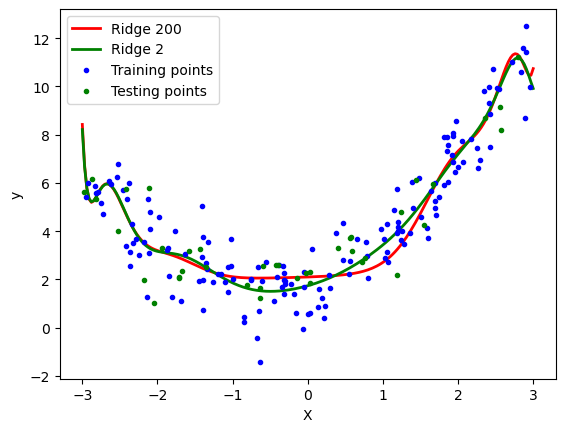

In [161]:
plt.plot(X_new, y_new1, "r-", linewidth=2, label="Ridge 200")
plt.plot(X_new, y_new2, "g-", linewidth=2, label="Ridge 2")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()